In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('./Resources/twitter_replies_data.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'screen_name', 'followers', 'following', 'verified',
       'tweet_count', 'default_prof_img', 'user_mentions', 'linked_urls',
       'has_#', 'time_to_respond_minutes', 'account_age_days',
       'follwers_to_following_ratio', 'avg_tweets_per_day', 'clean_text',
       'is_bot?'],
      dtype='object')

In [23]:
cols = ['user_mentions','linked_urls','has_#']

In [8]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


In [9]:
df.describe()

,followers,following,tweet_count,user_mentions,linked_urls,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,is_bot?
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,6233.678218,690.034653,6422.123762,1.237624,0.054455,93.128713,1732.000000,11.974455,12.116634,0.207921
std,29563.316244,882.130401,11532.244782,0.530625,0.227478,543.264788,1565.010794,77.472044,34.903065,0.406828
min,0.000000,0.000000,4.000000,0.000000,0.000000,-13.000000,3.000000,0.000000,0.010000,0.000000
25%,74.750000,152.000000,754.500000,1.000000,0.000000,1.000000,517.250000,0.240000,0.702500,0.000000
50%,190.500000,301.000000,2143.000000,1.000000,0.000000,3.000000,1051.000000,0.675000,2.315000,0.000000
75%,893.000000,975.500000,6184.750000,1.000000,0.000000,7.000000,3095.000000,1.960000,9.480000,0.000000
max,289250.000000,4990.000000,88975.000000,3.000000,1.000000,5209.000000,5513.000000,1014.910000,389.000000,1.000000


In [11]:
df['is_bot?'].value_counts()

0    160
1     42
Name: is_bot?, dtype: int64

In [16]:
len(df)

202

In [17]:
df = df.dropna()
len(df)

182

Count plot for ' user_mentions ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


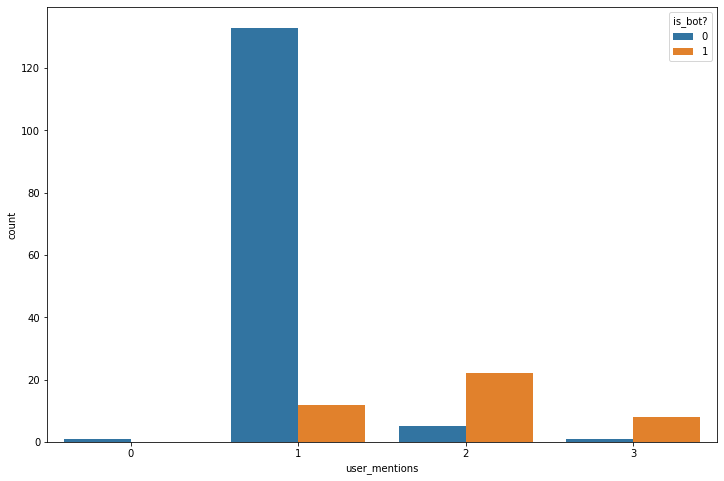

Count plot for ' linked_urls ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


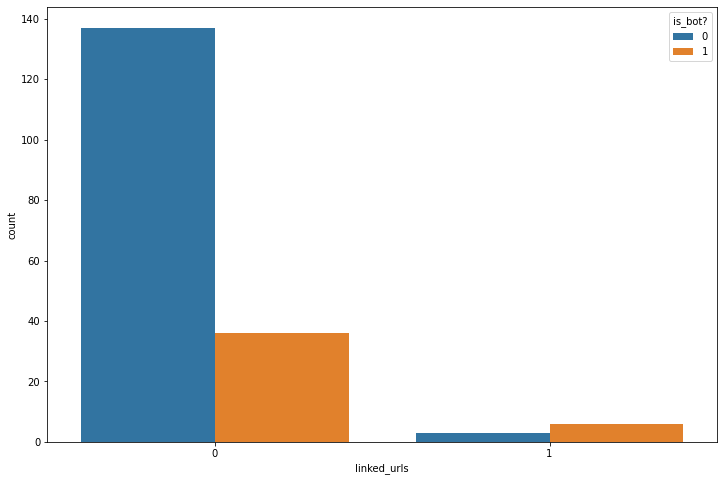

Count plot for ' has_# ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


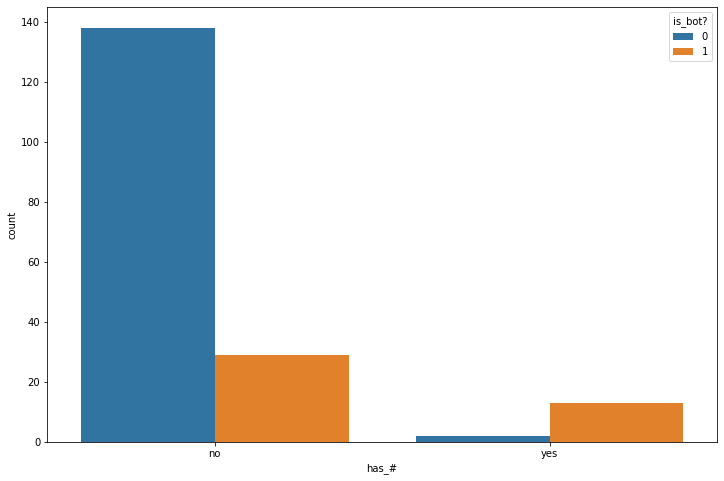

In [25]:
for i in range(0,len(cols)):
    plt.figure(figsize=(12,8))
    c = cols[i]
    print("Count plot for","'",cols[i],"' feature, based on Spam/ Ham tweet label")
    sns.countplot(c, hue=df['is_bot?'],data =df)
    plt.show()

In [26]:
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


In [27]:
X = df.drop(columns=['screen_name','clean_text','is_bot?'])
X.head()

,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day
0,462,73,False,545,False,1,0,no,100,1152,6.33,0.47
1,171,87,False,848,False,1,0,no,76,50,1.97,16.96
2,131,296,False,862,False,1,0,no,60,2448,0.44,0.35
3,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59
4,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66


In [28]:
y = df['is_bot?']

In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_bot?, dtype: int64

In [31]:
len(X), len(y)

(182, 182)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42,shuffle=True)

In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(145, 37, 145, 37)

In [34]:
y_test.value_counts()

0    28
1     9
Name: is_bot?, dtype: int64

* Numerical Columns for Standardization:
    * followers
    * following
    * tweet_count
    * time_to_respond_minutes
    * aaacount_age_days
    * followers_to_following_ratio
    * avg_tweets_per_day
* Categorical Columns that need encoding
    * verfied
    * default_prof_img
    * has_#

In [37]:
ct = make_column_transformer(
    (MinMaxScaler(), ['followers','following','tweet_count','time_to_respond_minutes',
                      'account_age_days','follwers_to_following_ratio','avg_tweets_per_day']),
    (OneHotEncoder(handle_unknown='ignore'),['verified','default_prof_img','has_#'])
)

In [38]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_normal,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test_normal)

accuracy_score(y_test,y_pred)

0.8108108108108109

In [46]:
tree_clf.score(X_test_normal,y_test)

0.8108108108108109

In [49]:
depth=[]
training_score=[]
testing_score = []


for i in range(1,25):
    clf_dt= DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    clf_dt.fit(X_train_normal,y_train)    
    pred_train = clf_dt.predict(X_train_normal)
    pred_test = clf_dt.predict(X_test_normal)

    depth.append(i)
    training_score.append(accuracy_score(y_train,pred_train))
    testing_score.append(accuracy_score(y_test,pred_test))

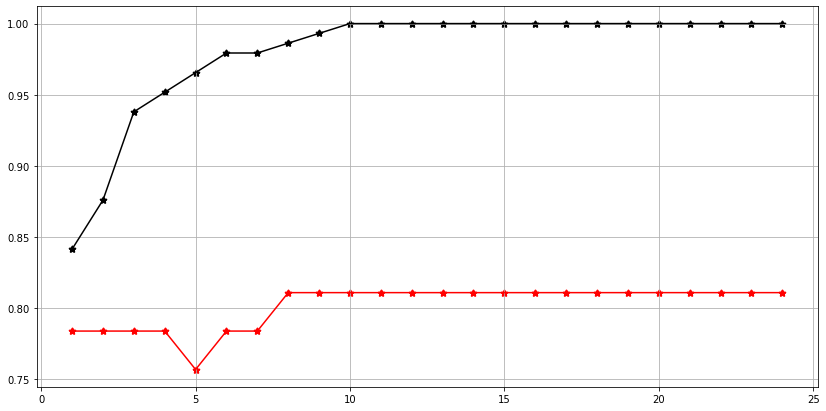

In [50]:
plt.figure(figsize=(14,7))
plt.grid()

plt.plot(depth, training_score,c='black')
plt.plot(depth, testing_score,c='red')
plt.scatter(depth, training_score,c='black',marker='*',linewidth=2)
plt.scatter(depth, testing_score,c='red',marker='*',linewidth=2)

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ['gini','entropy'],
    'max_depth': list(np.arange(1,50,1))
}
clf = DecisionTreeClassifier()
clf_grid = GridSearchCV(estimator=clf, param_grid=param_grid,cv=5)

clf_grid.fit(X_train_normal,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [54]:
clf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 38}

In [55]:
clf_dt = DecisionTreeClassifier(criterion=clf_grid.best_params_['criterion'],max_depth=clf_grid.best_params_['max_depth'],random_state=42)
clf_dt.fit(X_train_normal,y_train)
clf_dt.score(X_test_normal,y_test)

0.8378378378378378

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()

gbc_clf.fit(X_train_normal,y_train)

gbc_clf.score(X_test_normal,y_test)

0.8918918918918919

In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('gbc', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator= RandomForestClassifier(random_state=42),cv=5
)

stacking_clf.fit(X_train_normal,y_train)

stacking_clf.score(X_test_normal,y_test)

0.8918918918918919